<a href="https://colab.research.google.com/github/kianakiaei/TensorFlow/blob/main/01_neural_network_regression_with_tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.6.0


## Creating data to view and fit

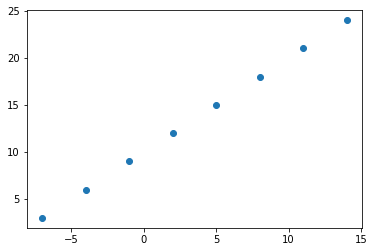

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y);

In [3]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes



In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = x[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [6]:
x[0].ndim

0

In [7]:
# Turn our NumPy arrays into tensors

x = tf.constant(x)
y = tf.constant(y)

x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = x[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

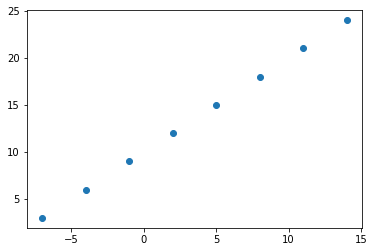

In [9]:
plt.scatter(x, y)

## Step in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hiddem layers of a deep learning model.
2. **Compiling a model** - define the loss function (in others word, the function with tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model
3. **Fitting a model** - letting the model try to find patterns between x & y (features and labels). 

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

# 1. other way
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(1)) 

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              # or loss="mae"
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent)
              metrics=["mae"])

# 3. Fit the model
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 670ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [11]:
# Check out x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** -  Here we might add more layers, increase the number of hidden units (All called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Comiling a model** - Here we might change the optimization function or perhaps the **leaning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

We only make one change at a time

**Common ways to improve a deep model:**
* Adding layes
* Increase the number of hidden units
* Change the activation functions (bydefault is None)
* Change the optimization functions
* Change the learning rate (most important hyper parameter of many different neural networks)
* Fitting on more data
* Fitting for longer (increase epochs)

In [13]:
# Let's rebuild our model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent)
              metrics=["mae"])

# 3. Fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 305ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 6m

In [14]:
# Remind ourselves of the data
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

array([[30.158512]], dtype=float32)

In [16]:
# Let's see if we can make another to improve our model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model (This time with an extra layer with 100 hidden units)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1)


])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 353ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7696 - mae: 11.7696
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2132 - mae: 11.2132
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6444 - mae: 10.6444
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0534 - mae: 10.0534
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.4344 - mae: 9.4344
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7821 - mae: 8.7821
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.0881 - mae: 8.0881
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 7.3552 - mae: 7.3552
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.5787 - mae: 6.5787
Epoch 11/100
1/1 [==============================] - 0s 5ms/step -

In [17]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

# Previous model did better although mae is less here
# Our model is over fitting

array([[31.38265]], dtype=float32)

In [18]:
# Let's see if we can make another to improve our model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model (This time with an extra layer with 50 hidden units)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation=None),
                             tf.keras.layers.Dense(1)


])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 370ms/step - loss: 13.1820 - mae: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.7017 - mae: 12.7017
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.2185 - mae: 12.2185
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.7299 - mae: 11.7299
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2333 - mae: 11.2333
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.7262 - mae: 10.7262
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2060 - mae: 10.2060
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.6700 - mae: 9.6700
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 9.1155 - mae: 9.1155
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 8.5396 - mae: 8.5396
Epoch 11/100
1/1 [==============================] - 0s 11ms/ste

In [19]:
model.predict([17.0])

# Its better

array([[29.787045]], dtype=float32)

In [20]:
# Let's see if we can make another to improve our model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model (This time with an extra layer with 50 hidden units)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation=None),
                             tf.keras.layers.Dense(1)


])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 403ms/step - loss: 13.1820 - mae: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.1147 - mae: 13.1147
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 13.0473 - mae: 13.0473
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 12.9799 - mae: 12.9799
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 12.9125 - mae: 12.9125
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 12.8450 - mae: 12.8450
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 12.7774 - mae: 12.7774
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 12.7098 - mae: 12.7098
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 12.6422 - mae: 12.6422
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 12.5745 - mae: 12.5745
Epoch 11/100
1/1 [==============================] - 0s 5m

In [21]:
model.predict([17.0])

array([[32.05097]], dtype=float32)

In [22]:
# Let's see if we can make another to improve our model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model (This time with an extra layer with 50 hidden units)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation=None),
                             tf.keras.layers.Dense(1)


])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 370ms/step - loss: 13.1820 - mae: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.5071 - mae: 12.5071
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.8279 - mae: 11.8279
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1425 - mae: 11.1425
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4485 - mae: 10.4485
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7427 - mae: 9.7427
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.0218 - mae: 9.0218
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 8.2826 - mae: 8.2826
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.5221 - mae: 7.5221
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 6.7841 - mae: 6.7841
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - 

In [23]:
model.predict([17.0])

# our best model

array([[27.216782]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweek a model -> fit it -> evaluate it-> tweek a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, Visualize, Visualize"

It's a good idea to visualize:
* The data - what data are we working with? what does it look like?
* The model itself- what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [24]:
# Make a bigger dataset

x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the dataset

y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

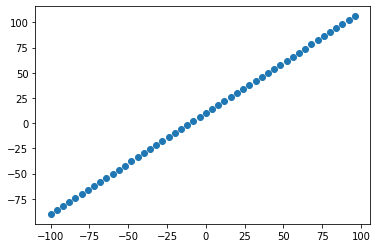

In [26]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(x, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **validation set** - the model gets tuned on this data, which is typically 10-5% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [27]:
# Check the length of how many samples we have
len(x)

50

In [28]:
# Split the data into train and test sets

x_train = x[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

x_test = x[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]
len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

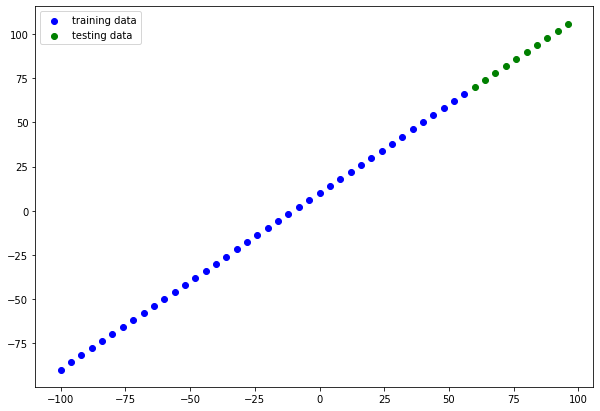

In [29]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter (x_train, y_train, c="b", label="training data") # Our model will learn on this

# Plot test data in green
plt.scatter (x_test, y_test, c="g", label="testing data") # Want our model to be able to predict this (given x, what's y?)

# show a legond
plt.legend();

In [30]:
x[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [31]:
# Let's a create a model which builds automatically by defining the input_shape argument in first

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1]) # 1 because we have 1 input and 1 output
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent)
              metrics=["mae"]) 

In [32]:
### Visualizing the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

**Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`

In [33]:
# Let's a create a model which builds automatically by defining the input_shape argument in first

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(2, input_shape=[1]) # 1 because we have 1 input and 1 output
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent)
              metrics=["mae"]) 

In [34]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 3. Fit the model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 33.1970 - mae: 33.1970
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 18.8325 - mae: 18.8325
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1691 - mae: 11.1691
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 7.8789 - mae: 7.8789
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 8.3661 - mae: 8.3661
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 8.1451 - mae: 8.1451
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 7.6192 - mae: 7.6192
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 7.9365 - mae: 7.9365
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 10.8356 - mae: 10.8356
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 9.3545 - mae: 9.3545
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss:

In [36]:
model.fit(x_train, y_train, epochs=100, verbose=0)

# Verbose 0 means there will be no output progress

In [37]:
# Get a summary of our model
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


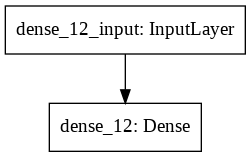

In [38]:
from tensorflow.keras.utils import plot_model

plot_model(model=model)

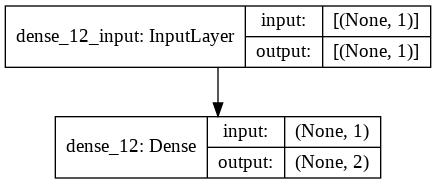

In [39]:
plot_model(model=model, show_shapes=True)

In [40]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
                             tf.keras.layers.Dense(1, name="output_layer") 
], name="model_1" )

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent)
              metrics=["mae"]) 

In [41]:
model.fit(x_train, y_train, epochs=100, verbose=0)

In [42]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


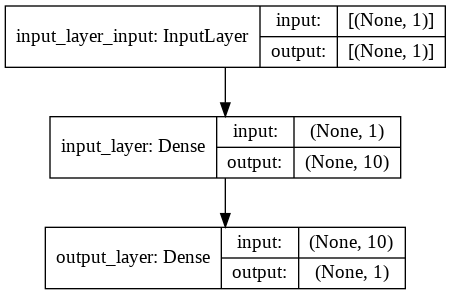

In [43]:
plot_model(model=model, show_shapes=True)

### Visualizing our model pridictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [44]:
# Make some predictions
y_pred = model.predict(x_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [45]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're ging to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [46]:
# Let's create a plotting function

def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test, 
                     test_labels=y_test, 
                     predictions=y_pred):
  """
  Plot training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="prediction")
  # Show the legond
  plt.legend();


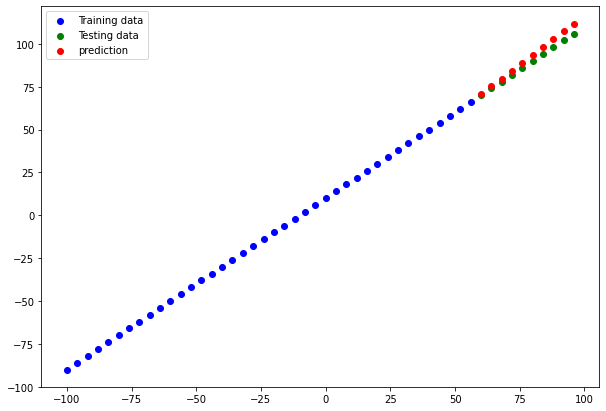

In [47]:
plot_predictions(train_data=x_train,
                 train_labels=y_train,
                 test_data=x_test, 
                 test_labels=y_test, 
                 predictions=y_pred)

### Evaluating our model's prediction with regression evaluation metrics

Depending on the problem you're working on. there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [48]:
# Evaluated the model on the test set
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 123ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [58]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred)
mae

# Not work, because one of them is array and another is tensor. the other reason is shape of them are not same

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [55]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [54]:
y_test

# Shape of y_test and y_pred are not the same 

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [56]:
tf.squeeze(y_pred)

# Now shape of y_test and y_pred are the same

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [59]:
# Now again calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [60]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test, 
                                     y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [61]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test, 
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test, 
                                        y_pred=tf.squeeze(y_pred))